# quant-econ Solutions: Optimal Savings

Solutions for http://quant-econ.net/py/ifp.html

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import compute_fixed_point
from ifp import ConsumerProblem

## Exercise 1

Starting value function iteration
Starting policy function iteration


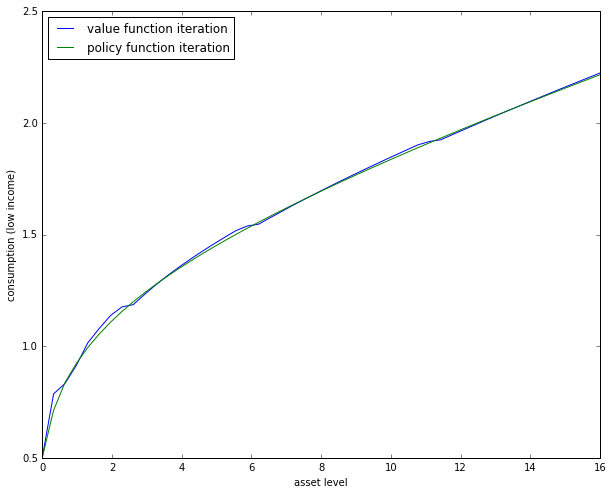

In [3]:
cp = ConsumerProblem()
K = 80

# Bellman iteration 
V, c = cp.initialize()
print("Starting value function iteration")
for i in range(K):
    # print "Current iterate = " + str(i)
    V = cp.bellman_operator(V)  
c1 = cp.bellman_operator(V, return_policy=True)  

# Policy iteration 
print("Starting policy function iteration")
V, c2 = cp.initialize()
for i in range(K):
    # print "Current iterate = " + str(i)
    c2 = cp.coleman_operator(c2)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(cp.asset_grid, c1[:, 0], label='value function iteration')
ax.plot(cp.asset_grid, c2[:, 0], label='policy function iteration')
ax.set_xlabel('asset level')
ax.set_ylabel('consumption (low income)')
ax.legend(loc='upper left')
plt.show()

## Exercise 2

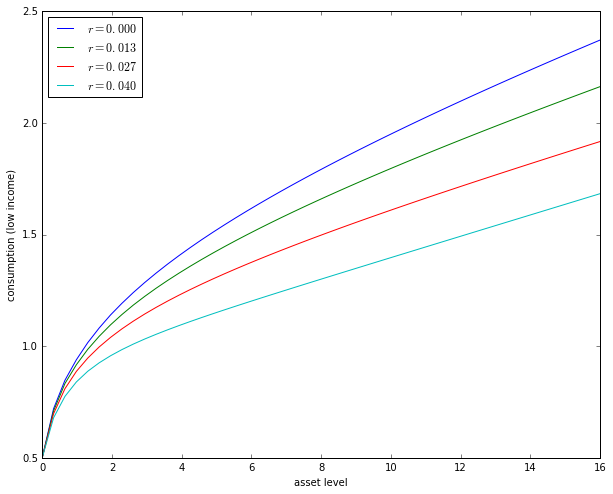

In [4]:

r_vals = np.linspace(0, 0.04, 4)  

fig, ax = plt.subplots(figsize=(10, 8))
for r_val in r_vals:
    cp = ConsumerProblem(r=r_val)
    v_init, c_init = cp.initialize()
    c = compute_fixed_point(cp.coleman_operator, c_init, verbose=False)
    ax.plot(cp.asset_grid, c[:, 0], label=r'$r = %.3f$' % r_val)

ax.set_xlabel('asset level')
ax.set_ylabel('consumption (low income)')
ax.legend(loc='upper left')
plt.show()

## Exercise 3

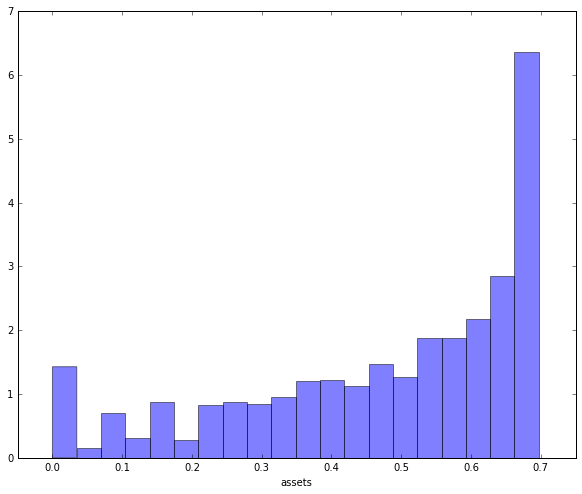

In [5]:

from scipy import interp
from quantecon import mc_sample_path 

def compute_asset_series(cp, T=500000, verbose=False):
    """
    Simulates a time series of length T for assets, given optimal savings
    behavior.  Parameter cp is an instance of consumerProblem
    """

    Pi, z_vals, R = cp.Pi, cp.z_vals, cp.R  # Simplify names
    v_init, c_init = cp.initialize()
    c = compute_fixed_point(cp.coleman_operator, c_init, verbose=verbose)
    cf = lambda a, i_z: interp(a, cp.asset_grid, c[:, i_z])
    a = np.zeros(T+1)
    z_seq = mc_sample_path(Pi, sample_size=T)
    for t in range(T):
        i_z = z_seq[t]
        a[t+1] = R * a[t] + z_vals[i_z] - cf(a[t], i_z)
    return a

cp = ConsumerProblem(r=0.03, grid_max=4)
a = compute_asset_series(cp)
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(a, bins=20, alpha=0.5, normed=True)
ax.set_xlabel('assets')
ax.set_xlim(-0.05, 0.75)
plt.show()

## Exercise 4

The following code takes a few minutes to run

Finished iteration b=1
Finished iteration b=3


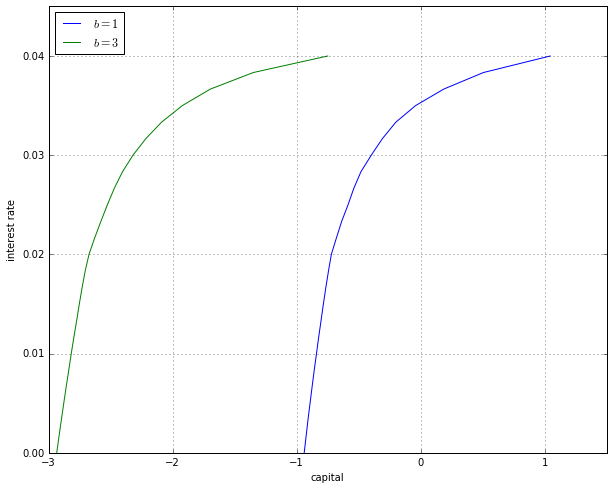

In [6]:

M = 25
r_vals = np.linspace(0, 0.04, M)  
fig, ax = plt.subplots(figsize=(10,8))

for b in (1, 3):
    asset_mean = []
    for r_val in r_vals:
        cp = ConsumerProblem(r=r_val, b=b)
        mean = np.mean(compute_asset_series(cp, T=250000))
        asset_mean.append(mean)
    ax.plot(asset_mean, r_vals, label=r'$b = %d$' % b)
    print("Finished iteration b=%i" % b)

ax.set_yticks(np.arange(.0, 0.045, .01))
ax.set_xticks(np.arange(-3, 2, 1))
ax.set_xlabel('capital')
ax.set_ylabel('interest rate')
ax.grid(True)
ax.legend(loc='upper left')
plt.show()